In [4]:
import tensorflow as tf
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

warnings.filterwarnings('ignore')


In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 2.0
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000


In [8]:
# Generate data
inputs, targets = make_blobs(n_samples=num_samples_total,
                             centers=centers,
                             n_features=num_features_for_samples,
                             cluster_std=cluster_std)

X_train, X_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)


In [9]:
np.save('./dataANN.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./dataANN.npy', allow_pickle=True)


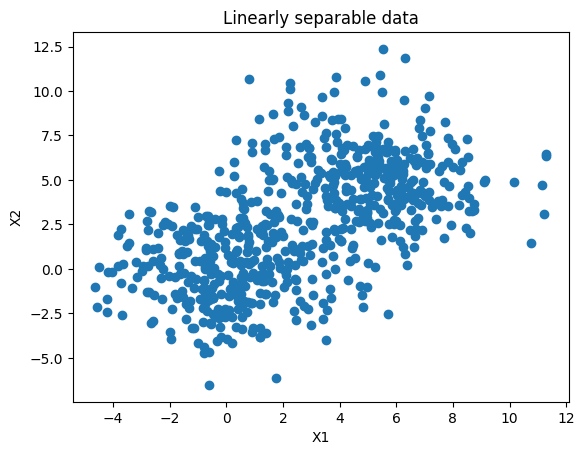

In [10]:
# Generate scatter plot for training data
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [11]:
print("Training Data :", X_train.shape)
print("Testing Data :", X_test.shape)


Training Data : (670, 2)
Testing Data : (330, 2)


In [15]:
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer='glorot_uniform',input_shape=(2,)))
ann.add(tf.keras.layers.Dense(
    6, activation='relu', kernel_initializer='glorot_uniform'))
ann.add(tf.keras.layers.Dense(
    1, kernel_initializer='glorot_uniform', activation='sigmoid'))
ann.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
ann.fit(X_train, y_train, batch_size=10, epochs=25)


Epoch 1/25
67/67 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.5701
Epoch 2/25
67/67 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8328
Epoch 3/25
67/67 [==============================] - 0s 924us/step - loss: 0.3139 - accuracy: 0.8731
Epoch 4/25
67/67 [==============================] - 0s 864us/step - loss: 0.2596 - accuracy: 0.9000
Epoch 5/25
67/67 [==============================] - 0s 833us/step - loss: 0.2206 - accuracy: 0.9119
Epoch 6/25
67/67 [==============================] - 0s 848us/step - loss: 0.1912 - accuracy: 0.9313
Epoch 7/25
67/67 [==============================] - 0s 818us/step - loss: 0.1682 - accuracy: 0.9373
Epoch 8/25
67/67 [==============================] - 0s 833us/step - loss: 0.1483 - accuracy: 0.9448
Epoch 9/25
67/67 [==============================] - 0s 881us/step - loss: 0.1340 - accuracy: 0.9582
Epoch 10/25
67/67 [==============================] - 0s 879us/step - loss: 0.1235 - accuracy: 0.9612
Epo

In [17]:
y_pred = ann.predict(X_test)
print(y_pred)


11/11 [==============================] - 0s 1ms/step
[[9.7551125e-01]
 [2.1247994e-04]
 [9.9984777e-01]
 [1.0463778e-03]
 [7.0857418e-01]
 [2.0927608e-03]
 [9.9974680e-01]
 [5.6032145e-01]
 [2.9666221e-06]
 [3.9645431e-05]
 [3.2063096e-04]
 [9.9995601e-01]
 [9.9659592e-01]
 [4.2552189e-03]
 [9.9909115e-01]
 [1.7822032e-04]
 [9.9982876e-01]
 [2.2161357e-01]
 [9.7838169e-01]
 [9.9981624e-01]
 [1.3632372e-02]
 [9.8158979e-01]
 [1.1959555e-02]
 [8.6368716e-01]
 [5.5191744e-02]
 [5.2849827e-03]
 [2.3182234e-02]
 [9.8800629e-01]
 [9.9362224e-01]
 [9.9993485e-01]
 [3.2449037e-01]
 [5.9404800e-05]
 [9.9773562e-01]
 [9.9987572e-01]
 [2.5500692e-04]
 [5.6486912e-03]
 [2.7353090e-05]
 [8.2936490e-01]
 [9.7903198e-01]
 [7.3544879e-04]
 [8.4046340e-01]
 [9.7662312e-01]
 [9.9693388e-01]
 [9.9908119e-01]
 [9.9851984e-01]
 [4.4425586e-04]
 [7.2268850e-01]
 [3.6977581e-03]
 [9.9982089e-01]
 [2.3821427e-02]
 [1.3116321e-02]
 [3.0863076e-01]
 [9.9608904e-01]
 [3.8933336e-05]
 [5.0390598e-05]
 [9.9298078e